In [1]:
%pylab inline
import seaborn as sns
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm

Populating the interactive namespace from numpy and matplotlib


In [2]:
def view_data(X, y=None):
    f, ax = plt.subplots(1,3,figsize=(18,5))
    if y is None:
        ax[0].scatter(X[:,0], X[:,1])
        ax[1].scatter(X[:,0], X[:,2])
        ax[2].scatter(X[:,1], X[:,2])  
    else:
        ax[0].scatter(X[:,0], X[:,1], c=y)
        ax[1].scatter(X[:,0], X[:,2], c=y)
        ax[2].scatter(X[:,1], X[:,2], c=y)
      

### Iris data set

<img  src="iris_petal_sepal.png" align="left" />  

> This dataset contains 150 samples, 4 dimensional features, 3 different labels

In [3]:
iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [4]:
len(np.unique(iris.target))

3

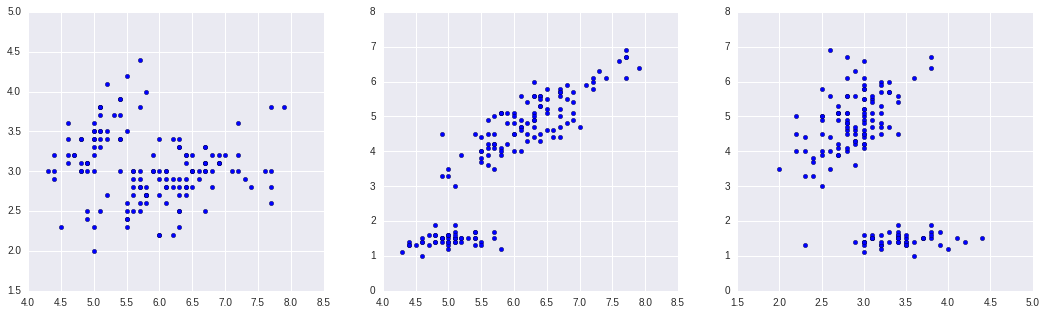

In [6]:
view_data(iris.data)

### SVM training

important class and method:
```
 - cross_validation.train_test_split(...)
 - clf = svm.SVC(kernel='linear', C=3)  ## C is penalty
 - clf.fit
 - clf.score
```

In [8]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [9]:
clf = svm.SVC(kernel='linear', C=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [10]:
err = clf.predict(iris.data) - iris.target
print err
print sum(err)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
2


In [11]:
clf.score(iris.data, iris.target)

0.98666666666666669

### Visualize the prediction

important class and method:
```
 - clf.predict(X)
```

In [10]:
labels = clf.predict(iris.data)

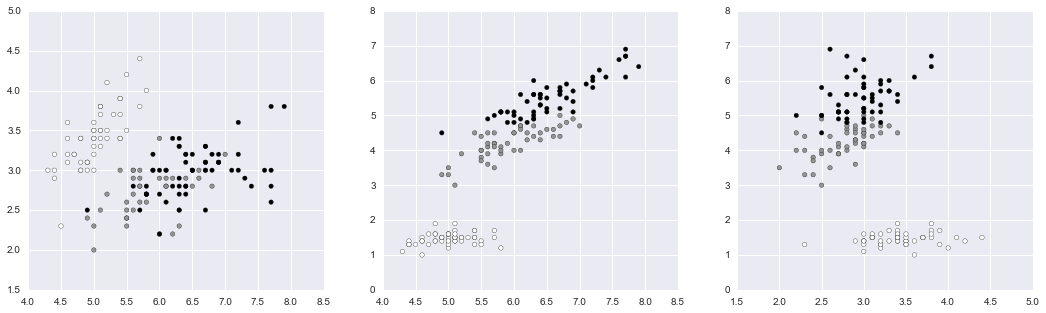

In [11]:
view_data(iris.data, labels)

### Cross-Validation error

Now, you already have a trained clf, let's test its performance by cross-validation

important class and method:
```
 - scores = cross_validation.cross_val_score(clf, X, y, cv=k_folds)
```

In [20]:
k_folds = 5
scores = cross_validation.cross_val_score(clf, iris.data, iris.target, cv=k_folds)
scores

array([ 0.96666667,  1.        ,  0.93333333,  0.96666667,  1.        ])

In [23]:
_ac_l = "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

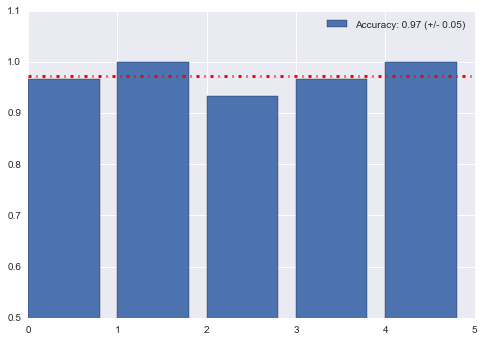

In [24]:
plt.bar(np.arange(k_folds), scores, label=_ac_l)
plt.axhline(scores.mean(),ls='-.', lw=3 ,c='r')
ylim(0.5,1.1)
legend(loc='best')

### density peak search clustering (pydpc)

In [15]:
from pydpc import Cluster

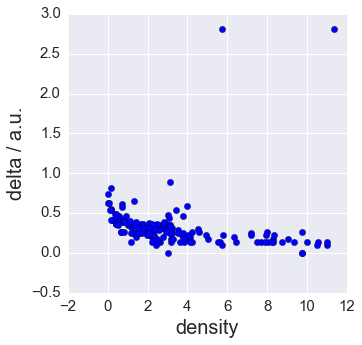

In [16]:
cluster = Cluster(iris.data)

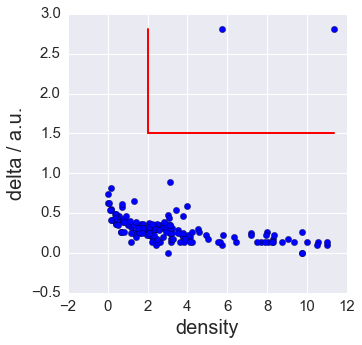

In [17]:
cluster.assign(2,1.5)

In [18]:
clu = cluster.membership

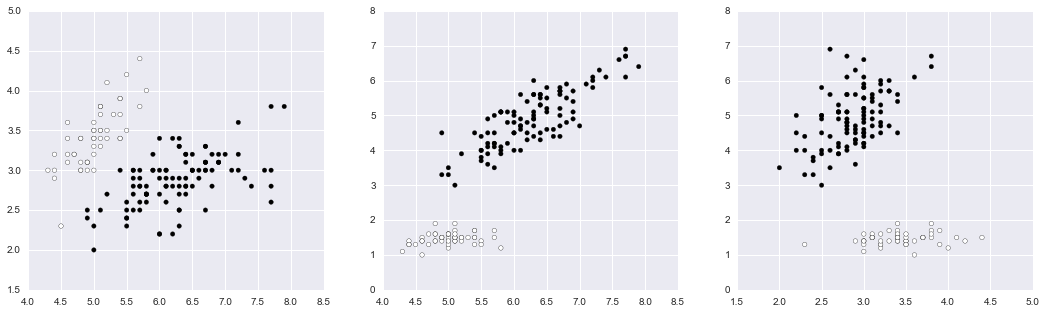

In [19]:
view_data(iris.data, clu)